___

___
___
# Decision Trees and Random Forests
## Data

This dataset includes various measurements of three different penguin species, namely :

1. Adelie
2. Gentoo
3. Chinstrap. 

Same as Iris data which had measurements of the three different species.

**Goal : Build a logistic regression model to predict the species of the palmer penguin, using body part lengths and body mass data.**

The rigorous study was conducted in the islands of the Palmer Archipelago, Antarctica. These data were collected from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network.

### Import Data

'penguins.csv'


# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Get the Data

**Use pandas to read penguins.csv as a dataframe called loans.**

In [174]:
df= pd.read_csv("penguins.csv")

**Check out the info(), head(), and describe() methods on penguins.**

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [176]:
df.dropna(inplace=True)

In [177]:
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,174.324324,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,98.386547,5.468668,1.969235,14.015765,805.215802,0.812944
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,90.000000,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,173.000000,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,259.000000,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [178]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


### Visualization Tasks

**Create a bar plot that shows the total counts per target value.**

<AxesSubplot:xlabel='species', ylabel='count'>

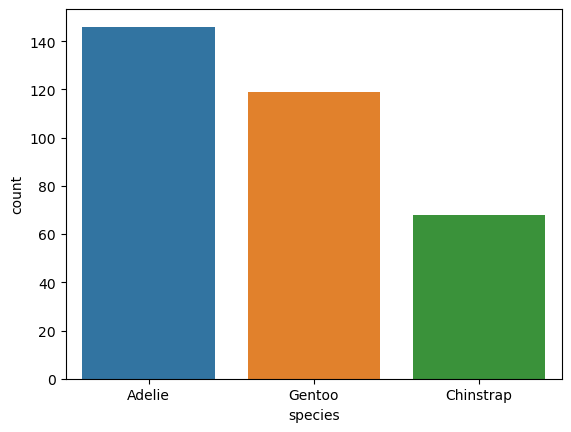

In [179]:
sns.countplot(x='species',data=df)

**Create bar plot that shows the total counts per target label.**

<AxesSubplot:xlabel='species', ylabel='count'>

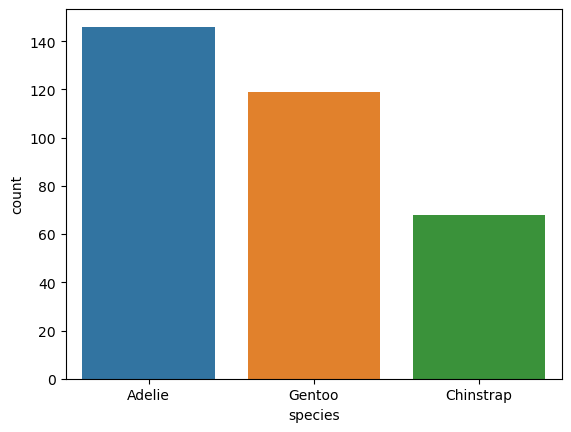

In [180]:
sns.countplot(x='species',data=df)

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check PINGUINS.info() again.**

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


## Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
# Split data into X and y.
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g' ]]
y = df['species']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [185]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [186]:
dtree = DecisionTreeClassifier()

In [187]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [188]:
from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix, precision_score, recall_score, accuracy_score

In [189]:
predictions = dtree.predict(X_test)

In [190]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.97        39
   Chinstrap       0.95      0.95      0.95        20
      Gentoo       1.00      0.95      0.97        41

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [191]:
print(confusion_matrix(y_test,predictions))

[[39  0  0]
 [ 1 19  0]
 [ 1  1 39]]


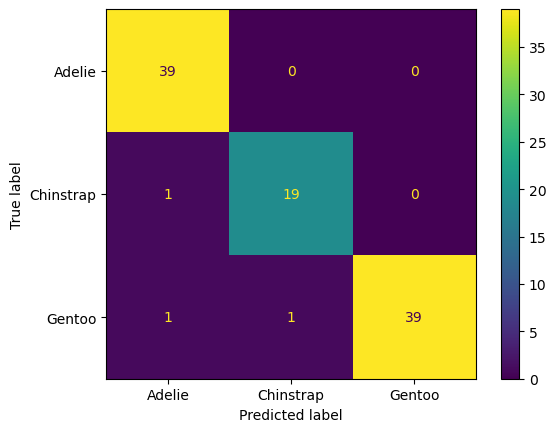

In [192]:
plot_confusion_matrix(dtree,X_test,y_test)

**Precision and Recall Scores**

In [193]:
precision_score(y_test, predictions,average='macro')

0.9670731707317074

In [194]:
recall_score(y_test, predictions,average='macro')

0.9670731707317074

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [197]:
rfc_pred = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [198]:
from sklearn.metrics import classification_report,confusion_matrix

In [199]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        39
   Chinstrap       0.95      1.00      0.98        20
      Gentoo       1.00      0.98      0.99        41

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



**Show the Confusion Matrix for the predictions.**

In [200]:
print(confusion_matrix(y_test,rfc_pred))

[[39  0  0]
 [ 0 20  0]
 [ 0  1 40]]


**Precision and Recall Scores**

In [201]:
precision_score(y_test, rfc_pred,average='macro')

0.9841269841269842

In [202]:
recall_score(y_test, rfc_pred,average='macro')

0.991869918699187

**What performed better the random forest or the decision tree?**

In [203]:
# Depends what metric you are trying to optimize for. 
# Notice the recall for each class for the models.
# Neither did very well, more feature engineering is needed.

# Great Job!